Epoch 1/10
270/270 [==============================] - 62s 226ms/step - loss: 0.4876 - accuracy: 0.7998 - val_loss: 0.4396 - val_accuracy: 0.8260
Epoch 2/10
270/270 [==============================] - 65s 240ms/step - loss: 0.4354 - accuracy: 0.8161 - val_loss: 0.4307 - val_accuracy: 0.8365
Epoch 3/10
270/270 [==============================] - 66s 243ms/step - loss: 0.4280 - accuracy: 0.8229 - val_loss: 0.4253 - val_accuracy: 0.8385
Epoch 4/10
270/270 [==============================] - 66s 244ms/step - loss: 0.4227 - accuracy: 0.8211 - val_loss: 0.4251 - val_accuracy: 0.8469
Epoch 5/10
270/270 [==============================] - 66s 244ms/step - loss: 0.4226 - accuracy: 0.8228 - val_loss: 0.4225 - val_accuracy: 0.8260
Epoch 6/10
270/270 [==============================] - 66s 244ms/step - loss: 0.4204 - accuracy: 0.8256 - val_loss: 0.4281 - val_accuracy: 0.8479
Epoch 7/10
270/270 [==============================] - 66s 243ms/step - loss: 0.4185 - accuracy: 0.8260 - val_loss: 0.4207 - val_ac

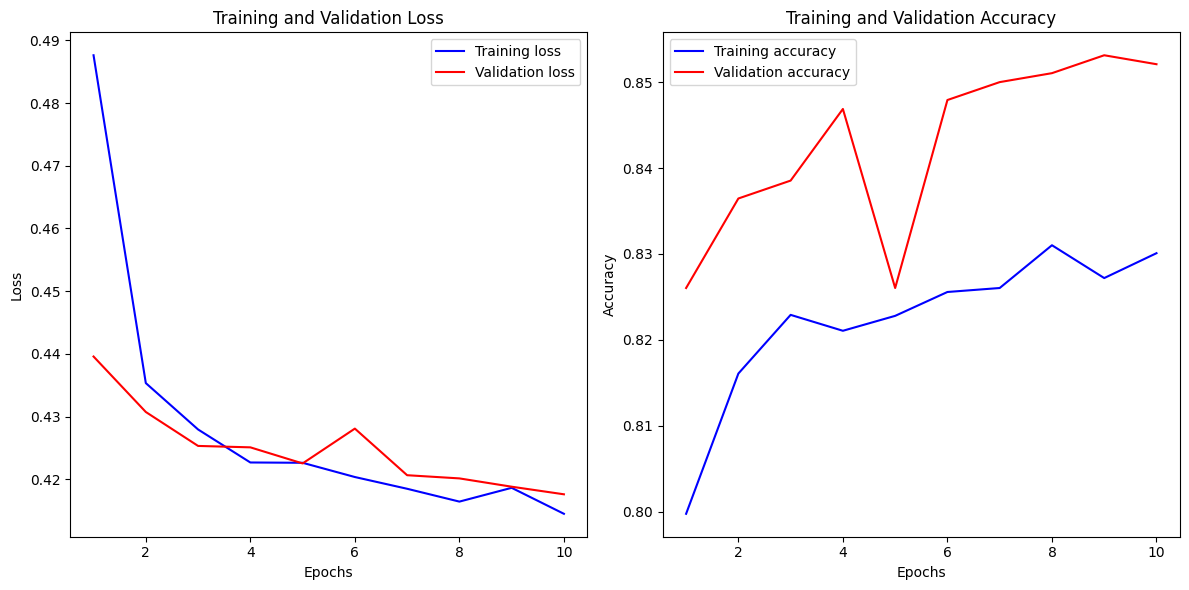

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import precision_recall_fscore_support
from keras.utils import to_categorical

file_path = r'D:\Research\Python\Notebooks\Final Notebooks\Training Data\Manually_Annotated_data_new.csv'
df = pd.read_csv(file_path, encoding='UTF-8', engine='python')

# Mapping sentiment labels to numerical values
Labelled_sentiment = {
    -1: 0,   # negative sentiment
    0: 1,    # neutral sentiment
    1: 2     # positive sentiment
}

# Update the 'Labelled_sentiment' column in the DataFrame
df['Labelled_sentiment'] = df['Labelled_sentiment'].map(Labelled_sentiment)

X = df['Preprocessed_Text'].astype(str)  # Features
y_true = df['Labelled_sentiment']  # True Labels
y_true = np.nan_to_num(y_true, nan=0)  # Replace NaN values with 0 for neutral sentiment

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

# Create and fit the TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert the 2D array to a 3D array by adding the channel dimension
X_train_cnn = X_train_tfidf.toarray().reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
X_test_cnn = X_test_tfidf.toarray().reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

# Create the CNN model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_tfidf.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the sentiment analysis task
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print("\nTesting Set:")
print("Loss:", loss)
print("Accuracy:", accuracy)

# Convert true labels to categorical format
y_test_categorical = to_categorical(y_test, num_classes=3)

# Make predictions on test data
y_pred = model.predict(X_test_cnn)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Display loss and accuracy during training
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
